# Table of Contents

1. [Introduction](#intro)
1. [Data preprocessing](#dat_pre)
    1. [Importing the data](#import)
    1. [Printing some glitches](#check)
    1. [Checking the metadata](#meta)
        1. [Bar chart of glitch class counts](#barplot)
        1. [Pairplot](#pairplot)
        1. [Correlation](#corr)
    1. [Image preprocessing](#img_pre)
        1. [Making dataframes from image data](#df_img)
        1. [Exporting to CSV files](#export_csv)
        1. [Setting up the dataframes](#set_up)
    1. [Handling uncommon features](#uncommon)
        1. [Identifying uncommon features](#id_uncom)
    1. [Handling identifiers](ids)
        1. [Combining the training, validation and test data](combine_df)
        1. [Identifying identifiers](id_ids)
        1. [Separating the training, validation and test data](sep_df)
    1. [Splitting the feature and target](split)
    1. [Scaling the data](#scale)
        1. [Standardization](#stand)
            1. [Standardizing the features](#stand_feat)
1. [Hyperparameter tuning](#hyper)
    1. [Creating the dictionary of the models](#dict_model)
    1. [Creating the dictionary of the pipelines](#dict_pipeline)
    1. [Getting the predefined split cross-validator](xval)
    1. [GridSearchCV](#gscv)
        1. [Creating the dictionary of the parameter grids](#dict_param_grid)
            1. [The parameter grid for LogisticRegression](#param_grid_logit)
            1. [The parameter grid for MLPClassifier](#param_grid_mlp)
            1. [The parameter grid for random forest](#param_grid_rf)
        1. [Creating the directory for the cv results produced by GridSearchCV](#dict_cv_res)
        1. [Tuning the hyperparameters](#tuning)
1. [Model Selection](#model_sel)

# Final Project: Determining glitch morphology classification
## DATS 6202 - Machine Learning I 
### Izzy Illari (gwid) and Lucia Illari (gwid)

# Introduction
<a id = "intro"></a>

<div align="left"> <font size="3"><i>Fig. 1:</i> The gravitational-wave event GW150914 observed by the LIGO Hanford (H1, left column panels) and Livingston (L1, right
column panels) detectors, with times shown relative to September 14, 2015 at 09:50:45 UTC. These are the time-frequency representation of the
strain data, demonstrating the "chirp" or frequency shift across time. (<a href="https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.116.061102">image source</a>) </font></div>

<img style="display: block; margin-left: 50px; margin-right: 50px" src="gw150914_chirp.png" align="center" width="1000">

First proposed by Henri Poincaré in 1905, Albert Einstein predicted the existence of gravitational waves (GWs), though he understood that the amplitudes of GWs would be incredibly small and even himself doubted their existence. Indeed, until the Chapel Hill conference four decades later there was considerable debate over their existence, as gravitational waves cannot exist in Newton’s law of universal gravitation. 

In the same year as the final formation of the field equations of general relativity, Schwarzschild would publish the solution for these field equations, and Kerr would go on to generalize this solution to rotating black holes. Further advances and breakthroughs have enabled the accurate modeling of black hole mergers and predictions of gravitational waveforms, which had not been previously directly observed until 14 September 2015, the first observance of a binary black hole merger. Until the collaborative efforts of LIGO and Virgo, gravitational waves had only been inferred indirectly. 

There are four main sources of GWs: continuous, inspiral, burst, and stochastic, with possible sources of detectable gravitational waves including binary star systems, composed of black holes, white dwarfs, and neutron stars ([2](#intro_gw)).

Since the change in distance that is being measured is in fact so small, a modified Michelson Interferometer was necessary. The US-based detectors are H1 and H2,
both located in Hanford, Washington and LI, located Livingston, Louisiana (L1) - comprise the Laser Interferometer Gravitational-wave Observatory (LIGO). H1 and
L1 both have 4-kilometer long arms, whereas H2 has 2-kilometer long arms. Advanced LIGO (aLIGO) replaced the three initial LIGO (iLIGO) interferometers with detectors using new instrument hardware ([3](#hardware)). The current intent is to offer the H2 interferometer components to India for the installation of a third LIGO observatory. The detectors have Fabry-Perot arm cavities, which increases the storage time of light, effectively increasing the arm length. Although the detectors are operating beyond their initial designs with greater sensitivity ([4](#sensitivity)), the detector’s are limited by glitches and noises in either the gravitational wave channel itself or the auxiliary channels, which monitor internal performance as well as the surrounding environment.

The Detector Characterization group (DetChar) is solely dedicated to the detection of and classification of unwanted disturbances within the GW channel and the auxiliary channels. There are innumerable numbers of both known and unknown sources of noise, the most prevalent of which are short-duration broadband events (also known as glitches), and longer intervals of nonstationary noise. There have been efforts since LIGO’s inaugural observational run to rapidly identify and mitigate noise originating in both the detectors and the environment. There are hundred of auxiliary channels, however, thus making the task of increasing search efficiency a difficult one.

Further, the range of time-frequency-amplitude morphologies that glitches come in is wide and ever evolving. These glitches can also mimic or obscur detections of true GWs, and thus a robust characterization pipeline is instrumental in improving the detectors and achieving the GW detection rates predicted by the design sensitivity of LIGO ([5](#gspy)). This project thus uses image data made publically available through the Zooniverse-hoested crowdsourcing project Gravity Spy and employes a variety of machine learning algorithms to categorize images, after being trained on human-classified examples of the morphological classes.

The original data was found <a href="https://www.kaggle.com/tentotheminus9/gravity-spy-gravitational-waves">here on Kaggle</a>, and contains three folders (with subfolders) of images for training, testing, and validation. There are 22 subfolders which organize the images into their glitch categories, which are 

* 1080 lines
* 1400 ripples
* air compressor
* blip
* chirp
* extremely loud
* helix
* koi fish
* light modulation
* low frequency burst
* low frequency lines
* no glitch
* none of the above
* paired doves
* power line
* repeating blips
* scattered light
* scratchy
* tomte
* violin mode
* wandering line
* whistle

Each glitch has 4 associated images, where the time range is decreased and decreased to get a zoomed in image of the glitch, so if there are 16 images in a glitch folder, there are "actually" 4 unqiue glitches. However, the images in this data set are only the plot space - axis labels, tick marks, legend, title, essentially anything extraneous - has been removed. There are 22349 images in the testing dataset, 4733 images in the training dataset, and 4800 images in the validation dataset.

**TO DO:**

- [X] add table of contents
- [X] write information between code cells and topics
    - [X] title
    - [X] intro
        - [X] about the dataset
        - [X] problem 
        - [X] motivation
    - [ ] experiment
        - [ ] code
        - [ ] discussion of results
    - [ ] conclusions
    
**for basic eda:**
    
- [X] import data
    - [X] select certain columns
    - [X] check if there is any missing data
    - [X] split data into test/train/val datasets
    - [X] use dummies function to encode categorical features (just ifo I think?) -> made `ifo_int` and `label_int` columns
    - [X] split features and target
- [X] counts of glitch classes & bar chart
- [X] corner plot
- [X] correlation
- [X] scale the data

**DO THESE FOR IMAGE CLASSIFICATION:**

- [X] Logistic reg/multinomial logit reg/softmax
- [X] Random forests
- [X] MLP Classifier
- [ ] ANN
- [ ] CNN
- [ ] KNN
- [X] Decision tree
- [ ] SVM

# Data preprocessing
<a id = "dat_pre"></a>

## Importing the data
<a id = "import"></a>

First thing first, of course, is importing the data. But before that, we need to import the appropriate packages.

In [1]:
#importing necessary packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# kaggle api
import kaggle
# find OS
import platform
pform = platform.system().lower()

#for setting the seed
random_seed = 1234

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Next thing, we want to get the current directory, then check what system the person running this code is using, so that the file paths are in teh correct format. We want to download the data straight from Kaggle, and check to see if the zip doesn't already live on the person's system.

In [2]:
#get current directory
directory = os.getcwd()

# check if OS is mac
if pform in ["darwin", "linux"]:
    print("OS is " + str(platform.system()))
    # check that data doesn't already exist
    if not os.path.isfile(directory + "/gravity-spy-gravitational-waves.zip"):
        print("File does not exist! Downloading...")
        # import data from Kaggle API
        # this downloads to current directory
        !kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves
    elif os.path.isfile(directory + "/gravity-spy-gravitational-waves.zip"):
        print("File exists!")

# check if OS is windows
elif pform in ['windows','cygwin']:
    print("OS is " + str(platform.system()))
    # check that data doesn't already exist
    if not os.path.isfile(directory + "\\gravity-spy-gravitational-waves.zip"):
        print("File does not exist! Downloading...")
        # import data from Kaggle API
        # this downloads to current directory
        !kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves
    elif os.path.isfile(directory + "\\gravity-spy-gravitational-waves.zip"):
        print("File exists!")

OS is Darwin
File exists!


If the file doesn't exist, the zip is downloaded. If it does, no download is necessary. Next step is to check if the file has already been unzipped. If there is no test, train, and validation folders, the file is unzipped.

In [3]:
%%capture
if pform in ["darwin", "linux"]:
    # check if data directories exist
    if not ( os.path.exists(directory + "/test/") 
            and os.path.exists(directory + "/train/") 
            and os.path.exists(directory + "/validation/") 
            and os.path.isfile(directory + "/trainingset_v1d1_metadata.csv") ):
        #unzip data
        !unzip "gravity-spy-gravitational-waves.zip"

elif pform in ['windows','cygwin']:
    # check if data directories exist
    if not ( os.path.exists(directory + "\\test") 
            and os.path.exists(directory + "\\train") 
            and os.path.exists(directory + "\\validation") 
            and os.path.isfile(directory + "\\trainingset_v1d1_metadata.csv") ):
        #unzip data
        !unzip "gravity-spy-gravitational-waves.zip"

Once we have the folders, for convenience's sake, we set some variables that contain the folder paths.

In [4]:
#get image data directories
if pform in ["darwin", "linux"]:
    train_dir = directory + '/train/train/'
    test_dir = directory + '/test/test/'
    val_dir = directory + '/validation/validation/'

elif pform in ['windows','cygwin']:
    train_dir = directory + '\\train\\train\\'
    test_dir = directory + '\\test\\test\\'
    val_dir = directory + '\\validation\\validation\\'

We would like a list of what all the glitch categories are, so let's just pull the titles of all the sub-folders, to preserve the order of the folders:

In [5]:
#get all glitch classes
categories = os.listdir(test_dir)

## Printing some glitches
<a id = "check"></a>

We have all these glitch categories, but (maybe) no idea what they look like! So let's go ahead and take a quick peak at one sample from each glitch category, so we can see what exactly we're working with here.

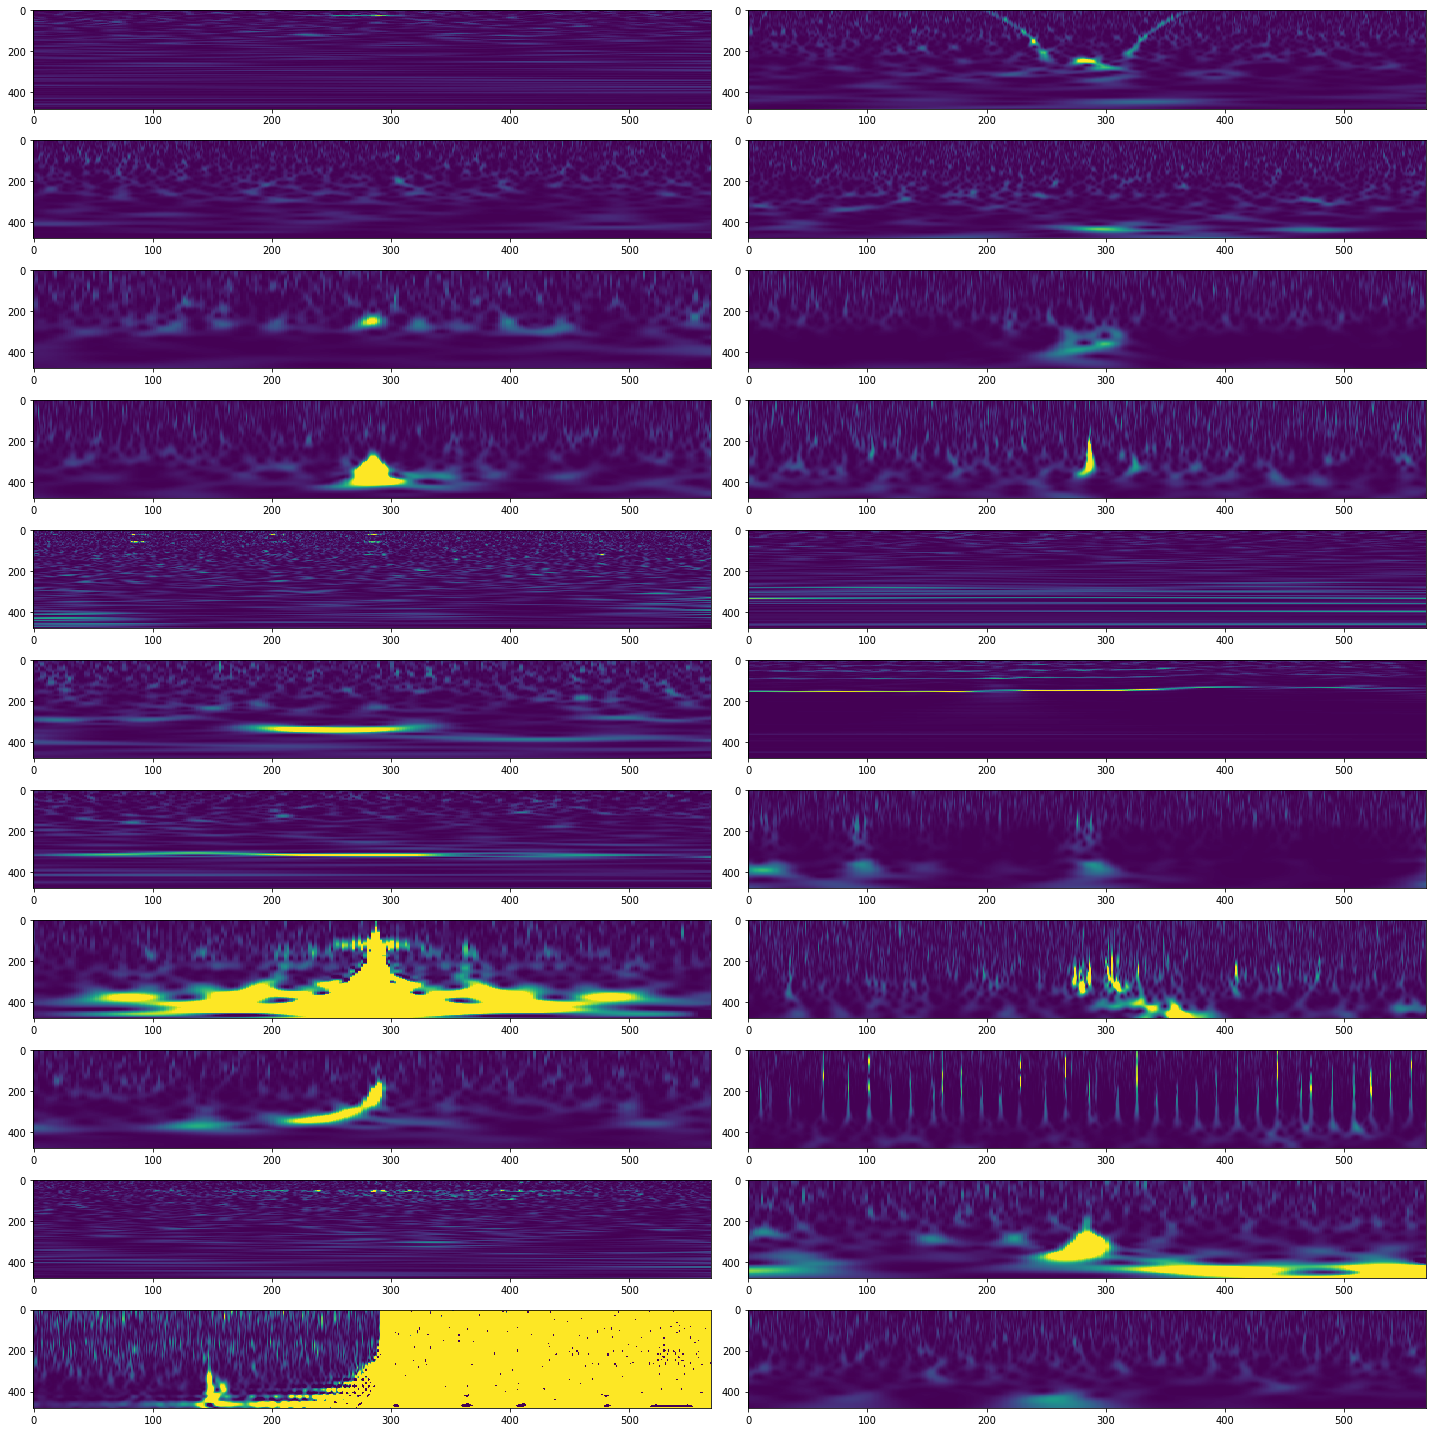

In [6]:
#let's look at one plot for each glitch class
counter = 0
fig, ax = plt.subplots(11, 2, figsize=(20, 20))

for k in range(2):
    for j in range(11):
        #get location folder of glitch class
        loc = train_dir + categories[counter]
        fold_loc = os.listdir(loc)
        #get image in folder
        if pform in ['windows','cygwin']:
            to_show = img.imread(loc + "\\" + fold_loc[round(len(fold_loc)/2)])
        elif pform in ["darwin", "linux"]:
            to_show = img.imread(loc + "/" + fold_loc[round(len(fold_loc)/2)])
        ax[j,k].imshow(to_show, aspect='auto')
        counter = counter + 1
        if counter == len(categories):
            break
    else:
        #only executed if the inner loop didn't break
        continue 
    #only executed if the inner loop did break
    break
plt.tight_layout()
plt.show()

## Checking the metadata
<a id = "meta"></a>

This dataset also contains some metadata, such as the origin detector, attribute information (central frequency, bandwidth, snr, amplitude, etc), and links to the original images. We want to load this metadata in.

In [7]:
#get image metadata
if pform in ['windows','cygwin']:
    meta_original = pd.read_csv(directory+'\\trainingset_v1d1_metadata.csv')
elif pform in ["darwin", "linux"]:
    meta_original = pd.read_csv(directory+'/trainingset_v1d1_metadata.csv')

Let's look at the columns names of the metadata, to see what sort of information we're dealing with here.

In [8]:
#view columns
meta_original.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

Let's go ahead and check if there is any missing data in the metadata (we see there is not):

In [9]:
#check if any missing data
meta_original.replace('', np.nan, inplace=True)
print("There are",meta_original.isnull().sum().sum(),"NaN elements in the metadata.")

There are 0 NaN elements in the metadata.


Next we're just interested in taking a quick peak at the proportion of images for each glitch class, so we need to get the counts.

In [10]:
#get the counts for the glitch classes
label_counts = pd.DataFrame(meta_original['label'].value_counts())
label_counts.reset_index(level=0, inplace=True)
label_counts = label_counts.rename(columns={"index": "class", "label": "counts"})
label_counts['percent'] = label_counts['counts']/label_counts['counts'].sum()*100

Most of the columns in the metadata aren't actually very useful or contain the same value for every glitch, so we are going to go ahead and drop some columns and rename some others.

In [11]:
#most of the columns are unnecessary for our purposes, so we will drop them
meta = meta_original[['duration','ifo','peak_frequency','central_freq','bandwidth','amplitude','snr','param_one_value','label','sample_type']]
meta = meta.rename(columns={"param_one_value": "phase"})

#subset metadata into train, test, and validation datasets
meta_train = meta[meta["sample_type"] == 'train']
meta_train.drop('sample_type', axis=1, inplace=True)

meta_test = meta[meta["sample_type"] == 'test']
meta_test.drop('sample_type', axis=1, inplace=True)

meta_val = meta[meta["sample_type"] == 'validation']
meta_val.drop('sample_type', axis=1, inplace=True)

Let's take a look at what we have left!

In [12]:
#quick look at data
meta_val

,duration,ifo,peak_frequency,central_freq,bandwidth,amplitude,snr,phase,label
3,0.82422,L1,1182.974609,3981.774658,7492.717773,1.462120e-22,10.321160,0.76242,Whistle
4,2.00366,L1,1456.511353,3979.026855,7942.912109,4.038300e-22,14.380160,-0.31161,Whistle
6,0.70312,L1,823.183594,2520.089111,4840.522949,9.513880e-23,9.273810,0.50844,Whistle
11,0.09375,L1,326.978760,325.483459,23.179831,5.591810e-22,7.765430,-0.26669,Whistle
13,0.30078,L1,1834.615723,3610.706787,6973.997559,1.835290e-22,8.530150,-1.12437,Whistle
...,...,...,...,...,...,...,...,...,...
7931,0.51758,H1,123.754059,138.069626,130.556854,6.967370e-23,8.591070,2.52188,Scratchy
7938,0.44531,H1,1085.830078,4298.645996,6898.204590,2.366700e-22,8.427400,-0.59947,1080Lines
7946,0.04688,L1,134.965424,206.664536,178.921906,5.645310e-22,9.388550,2.19965,Helix
7955,0.81250,L1,121.663269,444.386383,824.772766,9.080070e-22,82.451103,0.06565,Koi_Fish


### Bar chart of glitch class counts
<a id = 'barplot'></a>

Let's go ahead and look at the distribution of glitches.

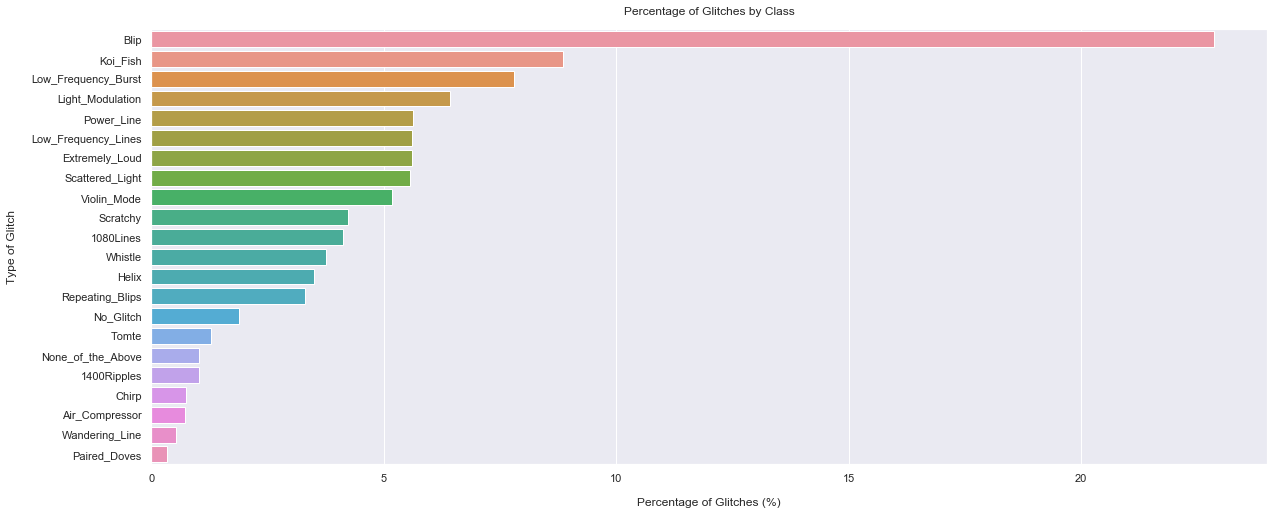

In [13]:
#setting plot size
sns.set(rc={'figure.figsize':(20,8)})

#let's look at how many glitch classes and how many of each kind there are
b1 = sns.barplot(x="percent", y="class", data=label_counts, orient = "h");
b1.set_ylabel("Type of Glitch", labelpad=14);
b1.set_xlabel("Percentage of Glitches (%)", labelpad=14)
b1.set_title("Percentage of Glitches by Class", y=1.02);

### Pairplot
<a id = 'pairplot'></a>

Let's go ahead and look at a pairplot of the data. There might be some interesting correlations in here.

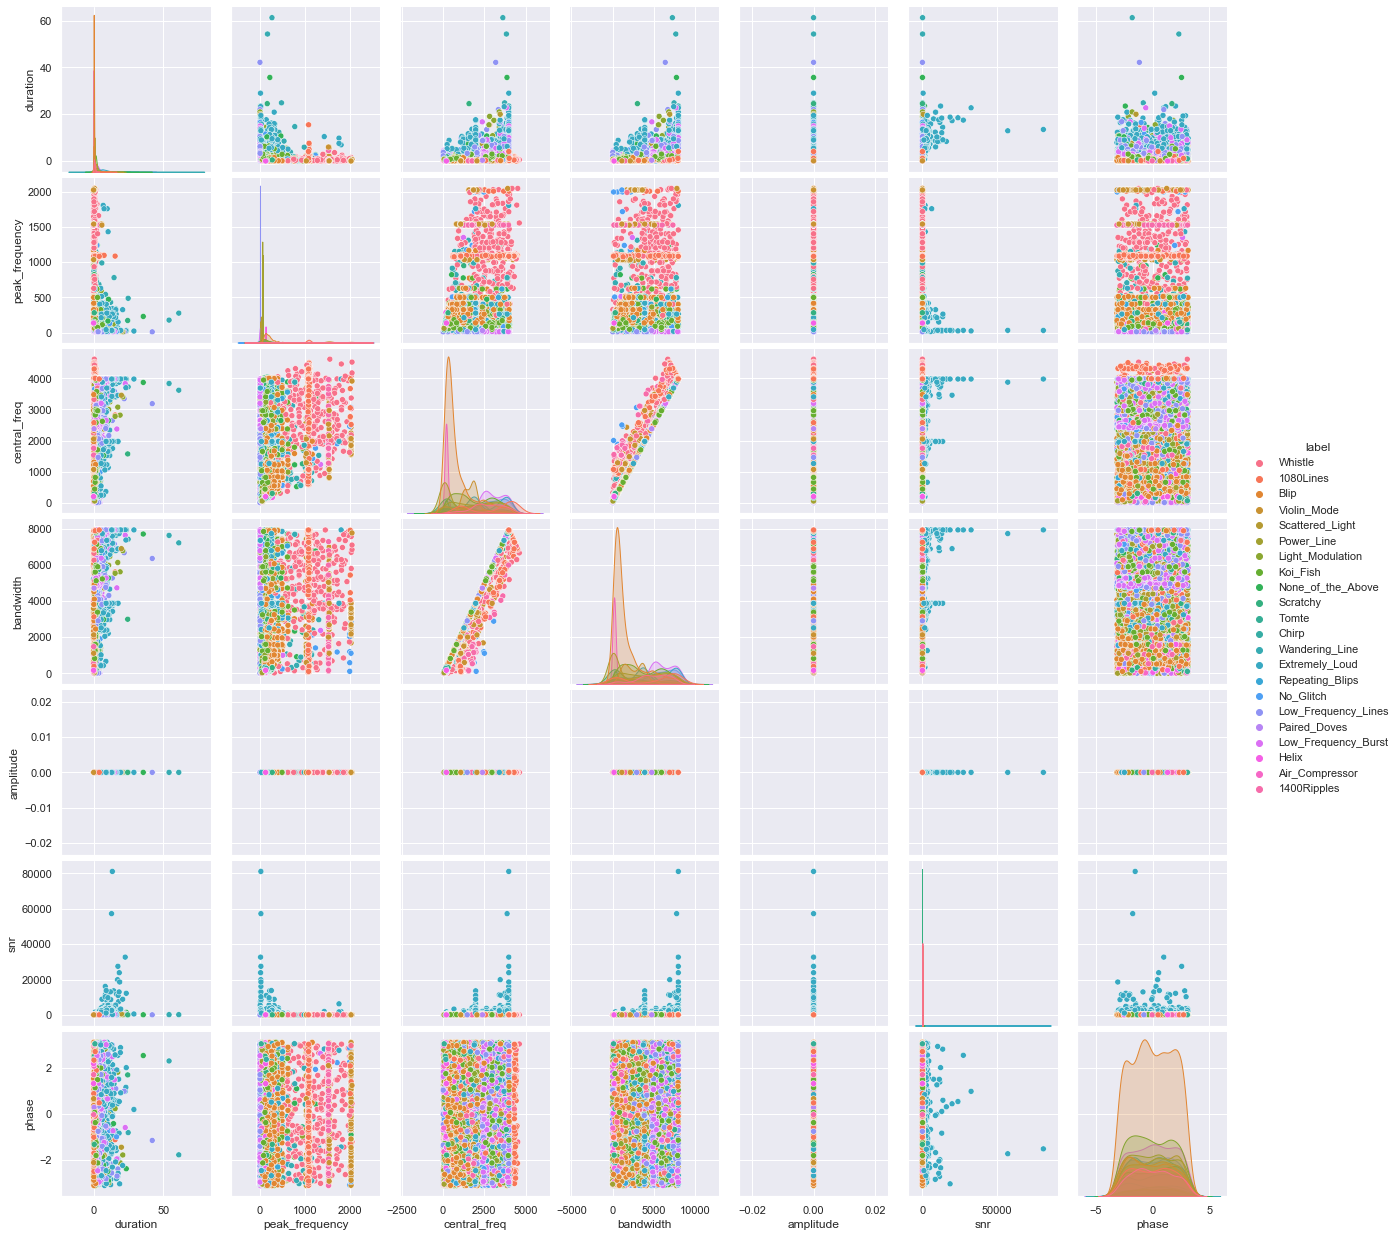

In [14]:
sns.pairplot(meta, hue="label");

In [15]:
print('The minimum amplitude value is '+str(min(meta['amplitude']))+'.')
print('The minimum amplitude value is '+str(max(meta['amplitude']))+'.')

The minimum amplitude value is 4.2510799103710293e-23.
The minimum amplitude value is 1.42988995019648e-16.


Now we might be mislead to believe from this that the amplitudes are all 0, but they're actually just very, very small, ranging from on the order of -23 to -16. These very small values just don't seem to be able to be represented well by the pairplot.

### Correlation
<a id = "corr"></a>

We have a sense of the correlation already from the pairplot, but let's go ahead and see the actually pearson correlation values as represented in a heat plot.

In [16]:
#integer encode the categorical columns
meta['label_int'] = meta.label.astype('category').cat.codes
meta['ifo_int'] = meta.ifo.astype('category').cat.codes

meta = meta[['duration', 'ifo','ifo_int', 'peak_frequency', 'central_freq', 'bandwidth',
       'amplitude', 'snr', 'phase', 'label','label_int', 'sample_type']]

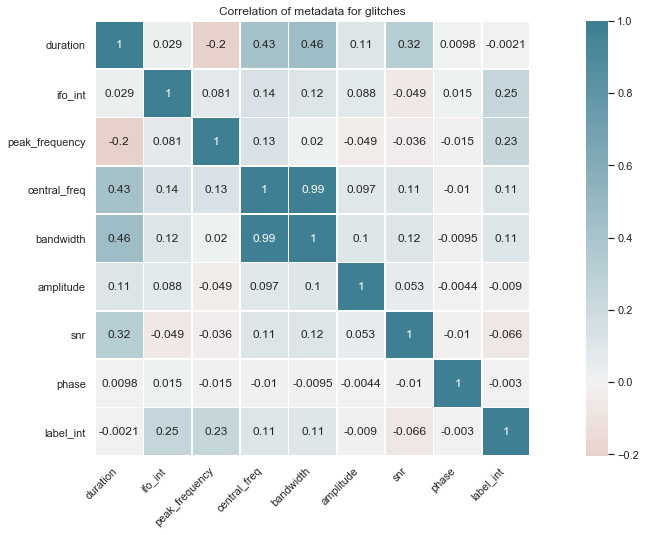

In [17]:
corr = meta.corr(method='pearson')

hm1 = sns.heatmap(corr,center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, linewidths=.5)
hm1.set_xticklabels(hm1.get_xticklabels(),rotation=45,horizontalalignment='right');
#strange cut-oof of top and bottom rows that requires manually setting the y-axis
hm1.set_ylim(9, 0);
hm1.set_title("Correlation of metadata for glitches");

## Image preprocessing
<a id = "img_pre"></a>

We are going to need the dimensions of the glitch images, so we get that now:

In [18]:
if pform in ['windows','cygwin']:
    samp_blip = img.imread(test_dir + 'Blip\\H1_0H27ffyt60_spectrogram_0.5.png')
elif pform in ["darwin", "linux"]:
    samp_blip = img.imread(test_dir + 'Blip/H1_0H27ffyt60_spectrogram_0.5.png')
samp_blip_shape = samp_blip.shape

#target size parameters
img_height = samp_blip_shape[0]
img_width = samp_blip_shape[1]

### Making dataframes from image data
<a id = "df_img"></a>

We want to get the images as 1D arrays with all their pixels as a numerical value that we can set as columns in a dataframe. One column should be the traget variable "label". Once we have these pixel values we can normalize the dataframe, and these dataframes can be used to train things such as our logit models.

In [19]:
from PIL import Image
def get_img_dim(resize_x, resize_y):
    """
    function to get the new dimensions of the images based on the desired resized values

    Parameters
    ----------
    resize_x: new width
    resize_y: new height
    
    Returns
    ----------
    arr_t.shape: shape of the array with image width, image height, and dimensions (color channels)
    """
    loc = test_dir + categories[0]
    fold_loc = os.listdir(loc)
    if pform in ['windows','cygwin']:
        to_show = load_img(loc + "\\" + fold_loc[0])
    elif pform in ["darwin", "linux"]:
        to_show = load_img(loc + "/" + fold_loc[0])
    to_show.thumbnail((resize_x, resize_y))
    arr_t = img_to_array(to_show)
    return arr_t.shape

In [20]:
# new image dimensions
img_h, img_w, dim = get_img_dim(200,200)
# number of pixels in resized image
num_pixels = img_h*img_w*dim
num_pixels

100800

In [21]:
def make_df_model(df_name, input_dir, num_img, xWidth, yWidth):
    """
    function to make a dataframe from images
    images are converted to arrays with pixels
    then converted to a 1D array with the label appended
    this 1D array is then appended to the dataframe

    Parameters
    ----------
    df_name: the name of the dataframe
    input_dir: the directory from which you will be getting your images (e.g. test_dir)
    num_img: the number of images you want to get from each category
    xWidth: new width to resize image
    yWidth: new height to resize image
    
    Returns
    ----------
    df_name: the dataframe now filled with one image per row and one pixel value per column will final column as label
    """
    sub_leng = 0
    sub_count = 0
    
    # loop through each image
    for i in range(len(categories)):
        # if we had more computing resources we could do all images
        # find location of images
        loc = input_dir + categories[sub_count]
        fold_loc = os.listdir(loc)
        dir_check = loc + "/"
        # get number of files in the current glitch category folder
        img_in_dir = len([name for name in os.listdir(dir_check) if os.path.isfile(os.path.join(dir_check, name))])
        # check if the number of files is greater than or equal to the number of images we desire
        if(img_in_dir >= num_img):
            val_run = num_img
        else:
            val_run = img_in_dir
        for m in range(val_run):
            # check os to make sure file path is correct
            if pform in ['windows','cygwin']:
                to_show = load_img(loc + "\\" + fold_loc[m])
            elif pform in ["darwin", "linux"]:
                to_show = load_img(loc + "/" + fold_loc[m])
            # resize image
            to_show.thumbnail((xWidth, yWidth))
            # use keras to change the image to an arrage of pixels
            img_array = img_to_array(to_show)
            # reshape to 1D array with num_pixels as elements
            end = num_pixels
            flat = img_array.reshape(1, end)
            # create the label as an array
            lab = np.array([i]).reshape(1, 1)
            # concat the 1D pixels array with the label
            flat2 = np.concatenate((flat, lab), axis=1)
            # append 1D image of pixels and labels to dataframe
            df_name.loc[len(df_name)] = flat2[0]  
    # return df
    return df_name

In [22]:
# get number of elements in array
end = num_pixels
# create column names for a dataframe that with have a column for each pixel
column_names = [None] * (end)
for i in range(0, end):
    column_names[i] = "pixel_" + str(i)
# last column is for the label
column_names.append("label")

# create empty dataframe with column names
df_train_img_info = pd.DataFrame(columns = column_names)
df_test_img_info = pd.DataFrame(columns = column_names)
df_valid_img_info = pd.DataFrame(columns = column_names)

# make dataframes
df_train_img_info = make_df_model(df_train_img_info, train_dir, 30, 200, 200)
df_test_img_info = make_df_model(df_test_img_info, test_dir, 30, 200, 200)
df_valid_img_info = make_df_model(df_valid_img_info, val_dir, 30, 200, 200)

### Exporting to CSV files
<a id = "export_csv"></a>

To save this for later use so that we don't have to go through converting the data every time, we want to export the data to some comma separated text files.

In [23]:
# function to export the csv files
def export_csv():
    """
    function to export 3 csv files: test, train, and validation data

    Parameters
    ----------
    none
    
    Returns
    ----------
    none
    """
    print("Making csv files with the dataframes...")
    # send dataframes to a csv file
    df_train_img_info.to_csv(r"df_train_img_info.csv", index=False)
    df_test_img_info.to_csv(r"df_test_img_info.csv", index=False)
    df_valid_img_info.to_csv(r"df_valid_img_info.csv", index=False)
    print("Done making csv files!")

In [24]:
# check if csv files already exist. if not, export using func above
if pform in ["darwin", "linux"]:
    if not (os.path.isfile(directory + "/df_train_img_info.csv") 
          and os.path.isfile(directory + "/df_test_img_info.csv")
          and os.path.isfile(directory + "/df_valid_img_info.csv")):
            print("CSV files do not exist. Exporting...")
            export_csv()
            print("Finished exporting CSV files!")
    else:
            print("CSV files already exist!")
elif pform in ["windows","cygwin"]:
    if not (os.path.isfile(directory + "\\df_train_img_info.csv") 
          and os.path.isfile(directory + "\\df_test_img_info.csv")
          and os.path.isfile(directory + "\\df_valid_img_info.csv")):
            print("CSV files do not exist. Exporting...")
            export_csv()
            print("Finished exporting CSV files!")
    else:
            print("CSV files already exist!")

CSV files already exist!


### Setting up the dataframes
<a id = "set_up"></a>

Let's look at the training dataframe:

In [25]:
df_train_img_info

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_100791,pixel_100792,pixel_100793,pixel_100794,pixel_100795,pixel_100796,pixel_100797,pixel_100798,pixel_100799,label
0,33.0,8.0,47.0,49.0,10.0,68.0,46.0,1.0,58.0,48.0,...,68.0,1.0,84.0,68.0,1.0,84.0,68.0,1.0,84.0,0.0
1,33.0,10.0,48.0,49.0,9.0,67.0,48.0,12.0,69.0,48.0,...,71.0,14.0,97.0,71.0,15.0,98.0,71.0,16.0,99.0,0.0
2,33.0,6.0,44.0,48.0,2.0,61.0,47.0,32.0,84.0,48.0,...,72.0,28.0,110.0,72.0,30.0,111.0,72.0,31.0,112.0,0.0
3,32.0,3.0,41.0,49.0,5.0,63.0,46.0,1.0,58.0,48.0,...,72.0,27.0,109.0,72.0,28.0,110.0,72.0,28.0,110.0,0.0
4,33.0,8.0,47.0,50.0,21.0,78.0,46.0,1.0,58.0,46.0,...,68.0,2.0,85.0,68.0,2.0,85.0,68.0,2.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,33.0,7.0,46.0,49.0,6.0,65.0,46.0,0.0,57.0,48.0,...,68.0,2.0,85.0,68.0,2.0,85.0,68.0,2.0,85.0,21.0
656,33.0,13.0,51.0,50.0,17.0,73.0,48.0,10.0,66.0,48.0,...,72.0,37.0,117.0,72.0,39.0,119.0,72.0,40.0,120.0,21.0
657,33.0,7.0,45.0,49.0,26.0,80.0,48.0,15.0,70.0,48.0,...,72.0,28.0,110.0,72.0,29.0,110.0,72.0,30.0,111.0,21.0
658,32.0,3.0,42.0,49.0,7.0,65.0,47.0,4.0,61.0,46.0,...,71.0,16.0,99.0,71.0,16.0,99.0,71.0,16.0,99.0,21.0


Let's look at the test dataframe.

In [26]:
df_test_img_info

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_100791,pixel_100792,pixel_100793,pixel_100794,pixel_100795,pixel_100796,pixel_100797,pixel_100798,pixel_100799,label
0,32.0,2.0,41.0,49.0,5.0,63.0,48.0,9.0,66.0,48.0,...,69.0,5.0,89.0,69.0,5.0,89.0,69.0,5.0,89.0,0.0
1,32.0,1.0,40.0,49.0,4.0,63.0,49.0,20.0,75.0,49.0,...,68.0,2.0,85.0,68.0,2.0,85.0,68.0,2.0,85.0,0.0
2,33.0,14.0,52.0,51.0,21.0,78.0,48.0,12.0,68.0,49.0,...,70.0,11.0,94.0,70.0,11.0,94.0,70.0,11.0,94.0,0.0
3,31.0,0.0,39.0,48.0,2.0,61.0,49.0,16.0,72.0,48.0,...,72.0,39.0,119.0,72.0,39.0,119.0,72.0,39.0,119.0,0.0
4,33.0,6.0,44.0,48.0,4.0,63.0,47.0,2.0,59.0,47.0,...,69.0,6.0,90.0,69.0,6.0,90.0,69.0,6.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,33.0,11.0,49.0,49.0,10.0,67.0,47.0,1.0,58.0,47.0,...,69.0,5.0,89.0,69.0,5.0,89.0,70.0,6.0,90.0,21.0
656,32.0,4.0,43.0,50.0,11.0,69.0,49.0,17.0,73.0,48.0,...,71.0,15.0,98.0,71.0,16.0,99.0,71.0,16.0,99.0,21.0
657,32.0,1.0,40.0,48.0,5.0,63.0,48.0,9.0,66.0,49.0,...,68.0,1.0,84.0,68.0,1.0,84.0,68.0,1.0,84.0,21.0
658,32.0,3.0,42.0,48.0,3.0,62.0,47.0,4.0,61.0,48.0,...,72.0,38.0,118.0,72.0,38.0,118.0,72.0,38.0,119.0,21.0


Let's look at the validation dataframe.

In [27]:
df_valid_img_info

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_100791,pixel_100792,pixel_100793,pixel_100794,pixel_100795,pixel_100796,pixel_100797,pixel_100798,pixel_100799,label
0,33.0,7.0,45.0,48.0,5.0,63.0,48.0,16.0,72.0,48.0,...,70.0,9.0,92.0,70.0,10.0,93.0,70.0,11.0,93.0,0.0
1,33.0,6.0,44.0,48.0,4.0,62.0,47.0,5.0,62.0,49.0,...,68.0,1.0,84.0,68.0,1.0,84.0,68.0,1.0,84.0,0.0
2,31.0,0.0,39.0,48.0,1.0,59.0,48.0,5.0,62.0,48.0,...,68.0,2.0,85.0,68.0,2.0,85.0,68.0,2.0,85.0,0.0
3,31.0,0.0,39.0,50.0,15.0,72.0,49.0,13.0,69.0,48.0,...,68.0,1.0,84.0,68.0,1.0,84.0,68.0,1.0,84.0,0.0
4,33.0,12.0,50.0,50.0,27.0,83.0,49.0,24.0,79.0,48.0,...,71.0,15.0,98.0,71.0,15.0,98.0,71.0,15.0,98.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,32.0,3.0,41.0,49.0,11.0,68.0,49.0,24.0,79.0,47.0,...,69.0,4.0,87.0,69.0,4.0,87.0,69.0,4.0,87.0,21.0
656,32.0,3.0,42.0,49.0,8.0,66.0,47.0,4.0,61.0,47.0,...,71.0,18.0,100.0,71.0,18.0,100.0,72.0,19.0,101.0,21.0
657,32.0,2.0,41.0,48.0,4.0,63.0,47.0,2.0,59.0,46.0,...,72.0,21.0,103.0,72.0,22.0,104.0,72.0,22.0,104.0,21.0
658,33.0,10.0,48.0,49.0,8.0,66.0,48.0,7.0,64.0,48.0,...,71.0,35.0,115.0,71.0,34.0,114.0,71.0,33.0,113.0,21.0


Let's get rid of the labels in the test data. We want labels in the training data but not test.

In [28]:
# Make a copy of df_train_img_info
# deep = True means that modifications to the data or indices of the copy will not be reflected in the original object 
df_train = df_train_img_info.copy(deep=True)

# Make a copy of df_test_img_info
df_test = df_test_img_info.copy(deep=True)
del df_test["label"]

# Make a copy of df_valid_img_info
df_val = df_valid_img_info.copy(deep=True)

Now that we have our dataframes we need our target variable.

In [29]:
# Get the name of the target
target = "label"
target

'label'

## Handling uncommon features
<a id = "uncommon"></a>

### Identifying uncommon features
<a id = "id_uncom"></a>

The code below shows how to find common variables between the training, validation and test data.

In [30]:
def common_var_checker(df_train, df_val, df_test, target):
    """
    The common variables checker

    Parameters
    ----------
    df_train : the dataframe of training data
    df_val : the dataframe of validation data
    df_test : the dataframe of test data
    target : the name of the target

    Returns
    ----------
    The dataframe of common variables between the training, validation and test data
    """
    
    # Get the dataframe of common variables between the training, validation and test data
    df_common_var = pd.DataFrame(np.intersect1d(np.intersect1d(df_train.columns, df_val.columns), np.union1d(df_test.columns, [target])),
                                 columns=['common var'])
                
    return df_common_var

In [31]:
# Call common_var_checker
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,label
1,pixel_0
2,pixel_1
3,pixel_10
4,pixel_100
...,...
100796,pixel_99995
100797,pixel_99996
100798,pixel_99997
100799,pixel_99998


## Handling identifiers
<a id = "ids"></a>

### Combining the training, validation and test data
<a id = "combine_df"></a>

The code below shows how to combine the training, validation and test data.

In [32]:
# convert variables to ints
df_train = df_train.astype("int")
df_val = df_val.astype("int")
df_test = df_test.astype("int")
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)
# show top of df
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_100791,pixel_100792,pixel_100793,pixel_100794,pixel_100795,pixel_100796,pixel_100797,pixel_100798,pixel_100799,label
0,33,8,47,49,10,68,46,1,58,48,...,68,1,84,68,1,84,68,1,84,0.0
1,33,10,48,49,9,67,48,12,69,48,...,71,14,97,71,15,98,71,16,99,0.0
2,33,6,44,48,2,61,47,32,84,48,...,72,28,110,72,30,111,72,31,112,0.0
3,32,3,41,49,5,63,46,1,58,48,...,72,27,109,72,28,110,72,28,110,0.0
4,33,8,47,50,21,78,46,1,58,46,...,68,2,85,68,2,85,68,2,85,0.0


### Identifying identifiers
<a id = "id_ids"></a>

The code below shows how to find identifiers from data.

In [33]:
def id_checker(df, dtype='float'):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    dtype : the data type identifiers cannot have, 'float' by default
            i.e., if a feature has this data type, it cannot be an identifier
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the dataframe of identifiers
    df_id = df[[var for var in df.columns
                # If the data type is not dtype
                if (df[var].dtype != dtype
                    # If the value is unique for each sample
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
    
    return df_id

In [34]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


There are no identifies that we need to remove. We also know that none of the columns are categorical, and thus we need not to encode any of them. 
### Separating the training, validation and test data
<a id = "sep_df"></a>

The code below shows how to separate the training, validation and test data.

In [35]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [36]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,660,100801


In [37]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,660,100801


In [38]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,660,100801


## Splitting the feature and target
<a id = "split"></a>

The code below shows how to split the feature and target.

In [39]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## Scaling the data
<a id = "scale"></a>

### Standardization
<a id = "stand"></a>

The code below shows how to standardize the data.

In [40]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

#### Standardizing the features
<a id = "stand_feat"></a>

The code below shows how to standardize the features.

In [41]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning
<a id = "hyper"></a>

## Creating the dictionary of the models
<a id = "dict_model"></a>

- In the dictionary:
    - the key is the acronym of the model
    - the value is the model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed)}

## Creating the dictionary of the pipelines
<a id = "dict_pipeline"></a>

In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [43]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Getting the predefined split cross-validator
<a id = "xval"></a>

In [44]:
from sklearn.model_selection import PredefinedSplit

def get_train_val_ps(X_train, y_train, X_val, y_val):
    """
    Get the:
    feature matrix and target velctor in the combined training and validation data
    target vector in the combined training and validation data
    PredefinedSplit
    
    Parameters
    ----------
    X_train : the feature matrix in the training data
    y_train : the target vector in the training data
    X_val : the feature matrix in the validation data
    y_val : the target vector in the validation data  

    Return
    ----------
    The feature matrix in the combined training and validation data
    The target vector in the combined training and validation data
    PredefinedSplit
    """  

    # Combine the feature matrix in the training and validation data
    X_train_val = np.vstack((X_train, X_val))

    # Combine the target vector in the training and validation data
    y_train_val = np.vstack((y_train.reshape(-1, 1), y_val.reshape(-1, 1))).reshape(-1)

    # Get the indices of training and validation data
    train_val_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_val.shape[0], 0))

    # The PredefinedSplit
    ps = PredefinedSplit(train_val_idxs)

    return X_train_val, y_train_val, ps

In [45]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

## GridSearchCV
<a id = "gscv"></a>

### Creating the dictionary of the parameter grids
<a id = "dict_param_grid"></a>

- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [46]:
param_grids = {}

#### The parameter grid for LogisticRegression
<a id = "param_grid_logit"></a>

- The hyperparameters we want to fine-tune are:
    - tol
    - C
- See details of the meaning of the hyperparametes in [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [47]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

#### The parameter grid for MLPClassifier
<a id = "param_grid_mlp"></a>

- The hyperparameters we want to fine-tune are:
    - alpha
    - learning_rate_init

- See details of the meaning of the hyperparametes in [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [48]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

#### The parameter grid for random forest
<a id = "param_grid_rf"></a>

- The hyperparameters we want to fine-tune are:
    - min_samples_split
    - min_samples_leaf

- See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [49]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

### Creating the directory for the cv results produced by GridSearchCV
<a id = "dict_cv_res"></a>

In [50]:
abspath_curr = os.getcwd()

if pform in ["darwin", "linux"]:
    # Make directory for results
    directory = os.path.dirname(abspath_curr + '/result/cv_results/GridSearchCV/')
    if not os.path.exists(directory):
        os.makedirs(directory)
elif pform in ["windows","cygwin"]:
    # Make directory for results
    directory = os.path.dirname(abspath_curr + '\\result\\cv_results\\GridSearchCV\\')
    if not os.path.exists(directory):
        os.makedirs(directory)

### Tuning the hyperparameters
<a id = "tuning"></a>

The code below shows how to fine-tune the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV.

In [51]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    if pform in ["darwin", "linux"]:
        cv_results.to_csv(path_or_buf=abspath_curr + '/result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)
    elif pform in ["windows","cygwin"]:
        cv_results.to_csv(path_or_buf=abspath_curr + '\\result\\cv_results\\GridSearchCV\\' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

In [52]:
# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.036298,"{'model__min_samples_leaf': 100, 'model__min_s...","((DecisionTreeClassifier(max_features='auto', ..."
1,0.032493,"{'model__alpha': 0.001, 'model__learning_rate_...","(MLPClassifier(alpha=0.001, early_stopping=Tru..."
2,0.003953,"{'model__C': 0.1, 'model__tol': 1e-05}","(LogisticRegression(C=0.1, class_weight='balan..."


# Model Selection
<a id = "model_sel"></a>

Here we will select best_estimator_gs as the best model. Later we will use this best model to generate a submission file.

# CNN stuff below here idk yet

In [ ]:
batch_size = 32 #default value
epochs = 50

In [ ]:
#we need to generate tensor image data

#first rescale it to treat all images in the same manner
train_imgdatgen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_imgdatgen = ImageDataGenerator(rescale = 1./255)
val_imgdatgen = ImageDataGenerator(rescale = 1./255)

#need to take the path to the directories then generate batches of augmented data
train_gen = train_imgdatgen.flow_from_directory(directory=train_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")
test_gen = test_imgdatgen.flow_from_directory(directory=test_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")
val_gen = val_imgdatgen.flow_from_directory(directory=val_dir, batch_size=batch_size, target_size=(img_height, img_width), class_mode='categorical', color_mode="rgb")

#return the total images in the datasets
tot_train = train_gen.n
tot_test = test_gen.n
tot_val = val_gen.n

In [ ]:
image, label = train_gen[10]

plt.imshow(image[0])
print('Label:', categories[int(np.where(label[0] == 1)[0])])

# Works Referenced

1. <a id = "img_src"></a> Abbott, B. P., et al. “Observation of Gravitational Waves from a Binary Black Hole Merger.” *Physical Review Letters*, vol. 116, no. 6, 2016, doi:10.1103/physrevlett.116.061102. 
1. <a id = "intro_gw"></a> "Introduction to LIGO and Gravitational Waves." LIGO Scientific Collaboration. N.p., n.d. Web.
1. <a id = "hardware"></a> LIGO Scientific Collaboration & Virgo Collaboration. *Characterization of transient noise in Advanced LIGO relevant to gravitational wave signal GW150914*.
1. <a id = "sensitivity"></a> Macleod, Duncan M & the LIGO Scientific Collaboration & the Virgo Collaboration. *Characterization of the LIGO detectors during their sixth science run*. 21 Oct. 2014.
1. <a id = "gspy"></a> Zevin, M, et al. “Gravity Spy: Integrating Advanced LIGO Detector Characterization, Machine Learning, and Citizen Science.” *Classical and Quantum Gravity*, vol. 34, no. 6, 2017, p. 064003., doi:10.1088/1361-6382/aa5cea. 
1. <a id = "yuxiaohuang"></a> Huang, Yuxiao. “yuxiaohuang/teaching.” *GitHub repository*, 2020, github.com/yuxiaohuang/teaching. 